In [1]:
import numpy as np
import scipy.special as sci
import matplotlib.pyplot as plt
from scipy import stats # linregress
import pandas as pd
from IPython.display import Latex

# Lecture 11:  Background of Groundwater Modeling


_(The contents presented in this section were re-developed principally by Dr. P. K. Yadav. The original contents are from Prof. Rudolf Liedl)_

---

## Motivation ### 

This lecture introduces the realm of mathematical modeling realm in groundwater studies. In the previous lectures the fundamental quantities, their properties and approach to quantify them were discussed. Those information were then used to develop system equations for varieties of groundwater problems. It was discussed then that these system equations require mathematical approaches the theory for which have to be systematically discussed and understood. Groundwater modeling can then be described as the systematic use of mathematical approaches leading to solution of the groundwater problem.


Groundwater modeling is often the first step towards understanding and solving groundwater problems/issues. Groundwater modeling is a very broad topic, this and the following lectures only introduces fundamental part of groundwater modeling. In this course we focus on groundwater flow problems.

## Introduction ##

### What is a Model? ###

Very succinctly a  **model** is a representation, which may be an image or a description of a real system. The description can be of different form (e.g., scales), of different level of detail (e.g., conceptual versus mathematical). The **system** to be modeled can be a **real** or also **conceptual**. A very relevant example of a real system for this course is the Darcy's experiment (see figure below), in which water is made  to flow through the porous media.


```{figure} images/M11_f1.png
---
scale: 60%
align: center
name: Darcy
---
Darcy's experimental setup<sup>[^Darcy(1856)]</sup>
```
With Darcy's experiment, one could set-up a mathematical model to relate flow rate and hydraulic gradient ($h$). As model is _only an image_ of the real system, several assumptions have to be made in it's development. At many instances the model can not be set without these assumptions. In other cases solution of the model may not be possible without these assumptions being part of the model development. Darcy‘s Law, for instance, does not provide an exact representation of flow through individual pore channels. Rather, **average** flow behaviour through **many** pore channels is represented.
  

[^Darcy(1856)]: Darcy, H., Les Fontaines Publiques de la Ville de Dijon, Dalmont, Paris, 1856.


### Model Types: Process-Based and Empirical Models ###  

Model can be classified in many ways. The following two types of classification are a more general way to classify models:

> 1. **Conceptual models**

> 2. **Process-Based and Empirical Models**

> 3. **Mathematical models**

#### Conceptual models ####

The **conceptual models** is classification of models that distinguishes the qualitative from the quantitative description of a real system. A **conceptual model** provides a qualitative representation of the relevant system components, processes, and impacts in the area of investigation. This representation is usually shown graphically, e.g., as block models (see figure {ref}`Cmodel`). It will be shown later that conceptual model in fact is the first block in the development of a mathematical model. 

```{figure} images/M11_f3.png
---
scale: 20%
align: center
name: Cmodel
---
A conceptual model showing different components of a hydrological system that can impact groundwater.
```


#### Physically based models and Empirical models ####

The **physically based models** also referred to as **process-based** models are models that exclusively relies on the fundamental physical laws - e.g., law of conservation of mass, energy, volume. _Compartment_  based models are example of physically based models.

Contrary to use of fundamental physical laws, **empirical models** are developed on the basis on experimental/collected data. Sorption isotherms that were developed in lecture [(10)](/contents/transport/lecture_10/22_reactive_transport) are types of emperical models. As was with the isotherms, these types of models are often based on regression analysis. Figure below show a prediction (blue) line as a predictor of data.


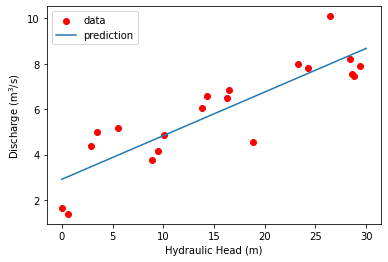

In [2]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x from 0 to 30
x = 30 * np.random.random((20, 1))

# y = a*x + b with noise
y = 0.2 * x + 3.0 + np.random.normal(size=x.shape)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x, y, c="red", label = "data")
ax.plot(x_new, y_new, label = "prediction")

ax.set_ylabel(r'Discharge (m$^3$/s)')
ax.set_xlabel('Hydraulic Head (m)')

ax.axis('tight')
ax.legend()

plt.close(fig)
glue("em_fit", fig, display=False ) 

```{glue:figure} em_fit
:figwidth: 600px
:name: "empirical"

Empirical relation between hydraulic head and discharge.
```

In certain cases **hybrid models**, e.g. **semi-empirical** models can also occur. These models combines the components of empirical/numerical and analytical models. Darcy's law in fact is a semi-empirical model. On the one hand, it is based on the momentum conservation.  On the other hand, it is not possible to _strictly_ deduce the direct proportionality between flow rate and hydraulic gradient by averaging the flow behaviour over all pores.


#### Mathematical models ####

A **mathematical model** provides a quantitative representation of the relevant system components (described by for e.g., conceptual model),processes (e.g., described by physical model) and impacts in the area of investigation. The quantitative representation is based on mathematical equations. The system equations, that were developed and discussed in Lecture [(7)](/contents/flow/lecture_07/17_quantify_flow) are mathematical models. 

System equation or mathematical models can in certain cases be solved directly resulting to an _exact solution_ called **analytical solution**. Theis equation that was developed in Lecture [(8)](/contents/flow/lecture_08/18_wells) to quantify aquifer drawdown resulting from pumping of groundwater is an example of an analytical solution. 

For more complex problems, often a more natural groundwater conditions, only _approximate_ (or non-exact) solution called **numerical solution** can be  obtained. Numerical solutions are obtained after converting the system equation to so called **numerical models**. 

Our focus in this introductory modeling lecture is to understand the development and solution of _numerical model_ of simple groundwater flow problems. 



### Example of an Analytical Solution ###

Consider a conceptual model presented in the Figure {ref}`Ditch`. The unconfined aquifer separates two surface exposed water bodies. The water body in the left has a higher hydraulic head ($h_0$, [L]) compared to that on the right ($h_u$). Thus the flow of water is from left water body to the right one along the separating aquifer. In this scenario one of the problem to address will be to understand how the aquifer reacts to change in heads of water bodies. Additionally, how additional water, e.g., from precipitation/recharge ($N$, [L/T]), will effect the aquifer water.

```{figure} images/M11_f4.png
---
scale: 20%
align: center
name: Ditch
---
Conceptual model of a flow between two water bodies separated by unconfined aquifer
```
The conceptual problem can be addressed when assumptions such as steady condition prevails, Darcy's law in aquifer is valid, recharge rate are relatively low. Based on the these assumptions, one of the **mathematical model** of this conceptual problem is:

$$
\frac{\textrm{d}}{\textrm{d}x}\bigg(-h \cdot K\cdot \frac{\textrm{d}h}{\textrm{d}x}  \bigg) = N
$$

and the 2 boundary conditions:

$$
h(0) = h_0 \:\: \text{and} \:\: h(L) = h_L
$$

Note that a complete formulation of mathematical model requires accompanying boundary conditions. The boundary conditions are used to uniquely define the problem. An _analytical solution_ for this mathematical model and accompanying boundary condition is:

$$
h(x) = \sqrt{h_o^2 - (h_o^2 - h_L^2)\cdot \frac{x}{L} + \frac{N}{K}\cdot x \cdot (L-x) }
$$

The solution can be used to quantify change in aquifer head $h$ with different system quantities, e.g., conductivity $K$ [L/T], recharge $N$ [L/T] water body heights $h_0,\, h_L$ [L] along the flow direction. 

The additional tool: _Conservative Transport_ ([TOOLS](/contents/tools/1D_ditchflow)) interactively simulates the ditch flow concept in more details.

### Example problem  ###

```{admonition} Ditch flow
Explore the effect of recharge ($N= 0$ and $N= 0.1$ mm/d) on the aquifer level for the conceptual problem provided above. Other required data are provided below. 
The effect are to be explored at mid of the aquifer
``` 



In [3]:
 print("Provided are:\n")

K = 2E-4 # hydraulic conductivity [m/s]
Ho = 10 # head at the origin [m]
Hu = 7.5 # head at L [m]
L = 175 #flow length [m]
N1 = 0 # no recharge [m/s]
N2 = 1000 # recharge [mm/a]

# intermediate calculation 
x = L/2 # mid of the aquifer [m]
N_ = N2/1000/365/86400 # recharge, [m/s]
 
#solution
h1=(Ho**2-(Ho**2-Hu**2)/L*x+(N1/K*x*(L-x)))**0.5
h2=(Ho**2-(Ho**2-Hu**2)/L*x+(N_/K*x*(L-x)))**0.5

print("hydraulic conductivity = {} m\nhead at origin = {} m\nhead at L = {} m\nflow length = {} m\nRecharge = {} mm/a".format(K, Ho, Hu, L, N2 ),"\n")
print("The resulting head without head is {:0.2f} m \n".format(h1))
print("The resulting head with head is {:0.2f} m \n".format(h2))



Provided are:

hydraulic conductivity = 0.0002 m
head at origin = 10 m
head at L = 7.5 m
flow length = 175 m
Recharge = 1000 mm/a 

The resulting head without head is 8.84 m 

The resulting head with head is 8.91 m 



### Example for a Model without Analytical Solution ###

Analytical solutions are rather an exception. Natural aquifer or groundwater system are more complex (see figure below) and therefore analytical solution are not possible. The complexity in natural system are due to parameter heterogeneity and irregular model domain boundaries, and these must be included in underlying model equation. 


```{figure} images/M11_f5.png
---
scale: 60%
align: center
name: nummodel
---
The numerical model of a natural aquifer
```




## Conceptual Model to Numerical Approach ##

The first step in modeling is to establish the purpose of the model. With that established, the development of conceptual model begins the set-up of the numerical model. This is a step-wise process that includes:

> 1. **Conceptual model** - providing hydrogeological units within the model domain

> 2. **Water budgeting** - identifying water containing units and characterizing it

> 3. **Numerical model** - Combining the units of conceptual model, water budgeting components and imposing _boundary conditions._ 

```{figure} images/M11_f6.png
---
scale: 60%
align: center
name: nummodel
---
The numerical model of a natural aquifer
```

The water budgeting part should include the sources of water inflowing to the system including the expected flow directions and exiting water. Estimate of Groundwater recharge, overland flow etc, are few examples of inflows. Likewise, estimate of baseflow to streams, evapotranspiration, abstraction wells etc. are outflows. Field data are required to prepare water budget.

The type of numerical model, depending on the modeling goal and required/available data, is then decided. The model type is mostly time-related (transient, steady) and dimension-related (1D,2D, 3D). 

### Data Requirements ###

Numerical model are often very data intensive. Several types of data of different origin are required in the development of a numerical model. These data come from site data records/maps, field works, lab works and the ancillary mathematical analysis of the field and lab data. Overall, the required data can be:

+ topographical maps (with surface waters and water divides)
+ geological maps, geological profiles (see figure {ref}`nummodel` example)
+ maps with isolines of aquifer bottoms / thicknesses , aquitard bottoms / thicknesses
+ maps indicating vertical extensions of sediments under rivers and lakes
+ hydrogeological maps (hydraulic head isolines)
+ water level time series in observation wells and rivers
+ time series of spring discharges
+ maps and profiles of hydraulic conductivity or transmissivity (also for river / lake sediments mentioned above)
+ maps and profiles of storage coefficients
+ information on spatial and temporal variability of inflow / outflow due to 
  - groundwater recharge                                                     
  - evapotranspiration                                                       
  - interaction between groundwater and surface water                        
  - groundwater abstraction                                                  
  - natural groundwater flow


## Example of a Groundwater Model ##

Let us now develop an example flow model. To begin with we set-up an overly simplified model that still will require a numerical solution. 

**Step 1** - Spatial Extension
+ Horizontal extension along $x-$direction: 4000 m
+ Horizontal extension along $y-$direction: 2500 m
+ vertical extension along $z$-direction: from $z = 250$ m a.s.l. at the aquifer bottom to $z= 265$ m at the aquifer top.
+ aquifer thickness is uniform = 15 m.

Putting these information graphically, we get the following schematic:

```{figure} images/M11_f7.png
---
scale: 40%
align: center
name: nummodel_ex
---
Spatial extension of an example numerical model
```
The example model is 2D and we _assume_ that vertical flow components can be neglected despite the recharge vertically entering the groundwater. These kinds of simplification are quite common in the development of the numerical model. These simplifications have to be justified when presenting model results. 

**Step 2** - Hydraulic Properties 

For our example model we consider the following:

+ effective porosity ($\eta_e$) in the model domain: 0.2 or 20%
+ two zones with different hydraulic conductivities ($K$)
+ two zones with different groundwater recharge
+ A section of a river (_river reach_) is in hydraulic contact with the aquifer. i.e. there may be water transfer from the river to the aquifer (_influent conditions_) or vice versa (_effluent conditions_).
+ inflow boundary with prescribed hydraulic heads
+ outflow boundary with prescribed hydraulic heads
+ two impermeable boundaries

**Step 3** - The model purpose and conceptual model

From our example model we intend to:

+ Abstraction of groundwater through wells is planned in the area with an overall pumping rate of 7000 m$^3$/d.

+ Water extraction is to be distributed between two wells located at $(x,y) =$ (3050 m, 1550 m) and $(x,y)$ = (3050 m, 1450 m), resp.

+ The model purpose is to outline the 50-days isochrone for both wells. 

With these information available, our conceptual model takes the following form:

```{figure} images/M11_f8.png
---
scale: 25%
align: center
name: Concept_model
---
The conceptual model of the example model
```
**Step 4** - The numerical approach 

This is discussed in the next lecture.